<a href="https://colab.research.google.com/github/SRIKARREDDY-dotorg/Hand-Written-hindi-script-recognition/blob/master/FYP_DENSENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
pip install scikit-plot

In [ ]:
train_dir="/content/drive/MyDrive/dataset_1/train"
test_dir="/content/drive/MyDrive/dataset_1/test"
valid_dir="/content/drive/MyDrive/dataset_1/val"  

In [ ]:
traindata_gen=ImageDataGenerator(
    rescale=1./255.0,
    rotation_range=70,
    horizontal_flip=True,
    fill_mode='nearest'
)
valid_datagen=ImageDataGenerator(rescale=1./255.0,
    fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255.0,
    fill_mode='nearest')

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.models import Model
import keras
DenseNet = DenseNet121(include_top=False, weights='imagenet', input_shape=(224,224,3))
output = DenseNet.layers[-1].output
output = keras.layers.Flatten()(output)
DenseNet = Model(DenseNet.input,output)
for layer in DenseNet.layers:
    layer.trainable = False
DenseNet.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_____________________________

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer,BatchNormalization
from keras.models import Sequential
from keras import optimizers
input_shape = (224,224)
model = Sequential()
model.add(DenseNet)
model.add(Dense(2048, activation = 'relu', input_dim = input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu',kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
             optimizer = optimizers.Adam(lr = 2e-5),
             metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 50176)             7037504   
_________________________________________________________________
dense (Dense)                (None, 2048)              102762496 
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 7

In [ ]:

from math import floor
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler
INIT_LR = 1e-4
decay_rate = 0.95
decay_step = 1


callbacks = [ModelCheckpoint(filepath='best_cnn_model1.h5', monitor='val_loss',mode='min',verbose=1,save_best_only=True,save_weights_only=True),
             LearningRateScheduler(lambda epoch : INIT_LR * pow(decay_rate, floor(epoch / decay_step))),EarlyStopping(monitor='val_loss',patience=10)]

In [ ]:
train_generator=traindata_gen.flow_from_directory(
    train_dir,
    batch_size=16,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(224,224),
    shuffle=True,
        seed=42
)
valid_generator=valid_datagen.flow_from_directory(
    valid_dir,
    batch_size=16,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(224,224),
    shuffle=True,
        seed=42
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    batch_size=1,
    color_mode="rgb",
    class_mode='categorical',
    target_size=(224,224),
    shuffle=False,
    seed=42
)

Found 7770 images belonging to 3 classes.
Found 732 images belonging to 3 classes.
Found 915 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(
                generator=train_generator,
                steps_per_epoch=train_generator.n//train_generator.batch_size,
                validation_data=valid_generator,
                validation_steps=valid_generator.n//valid_generator.batch_size,
                epochs=100,
                callbacks=callbacks
  )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
485/485 [==============================] - 2664s 5s/step - loss: 4.5299 - accuracy: 0.8275 - val_loss: 2.9163 - val_accuracy: 0.9097

Epoch 00001: val_loss improved from inf to 2.91634, saving model to best_cnn_model1.h5
Epoch 2/100
485/485 [==============================] - 274s 564ms/step - loss: 2.5709 - accuracy: 0.9045 - val_loss: 1.9145 - val_accuracy: 0.8903

Epoch 00002: val_loss improved from 2.91634 to 1.91453, saving model to best_cnn_model1.h5
Epoch 3/100
485/485 [==============================] - 268s 552ms/step - loss: 1.7177 - accuracy: 0.9147 - val_loss: 1.3649 - val_accuracy: 0.9181

Epoch 00003: val_loss improved from 1.91453 to 1.36488, saving model to best_cnn_model1.h5
Epoch 4/100
485/485 [==============================] - 265s 547ms/step - loss: 1.2175 - accuracy: 0.9276 - val_loss: 0.9921 - val_accuracy: 0.9347

Epoch 00004: val_loss improved from 1.36488 to 0.99211, saving model to best_cnn_model1.h5
Epoch 5/100
485/485 [=============================

In [ ]:
    test_generator.reset()
    predY=model.predict_generator(
            test_generator,
            steps=1+test_generator.n//test_generator.batch_size,
            verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


916/916 [==============================] - 293s 318ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
class_to_label_map = {2 : 'pneumonia', 1 : 'covid', 0 : 'normal'}
testY = test_generator.classes
confusion__matrix=confusion_matrix(testY, np.argmax(predY, axis = -1))
cr=(classification_report(testY, np.argmax(predY, axis = -1), target_names=class_to_label_map, output_dict=True))

In [ ]:
confusion__matrix

array([[301,   4,   0],
       [ 15, 283,   7],
       [  1,  31, 273]])

In [ ]:
cr

{0: {'f1-score': 0.9333333333333332,
  'precision': 0.975,
  'recall': 0.8950819672131147,
  'support': 305},
 1: {'f1-score': 0.9085072231139647,
  'precision': 0.889937106918239,
  'recall': 0.9278688524590164,
  'support': 305},
 2: {'f1-score': 0.9678456591639872,
  'precision': 0.9495268138801262,
  'recall': 0.9868852459016394,
  'support': 305},
 'accuracy': 0.9366120218579235,
 'macro avg': {'f1-score': 0.9365620718704283,
  'precision': 0.9381546402661217,
  'recall': 0.9366120218579236,
  'support': 915},
 'weighted avg': {'f1-score': 0.9365620718704285,
  'precision': 0.9381546402661217,
  'recall': 0.9366120218579235,
  'support': 915}}

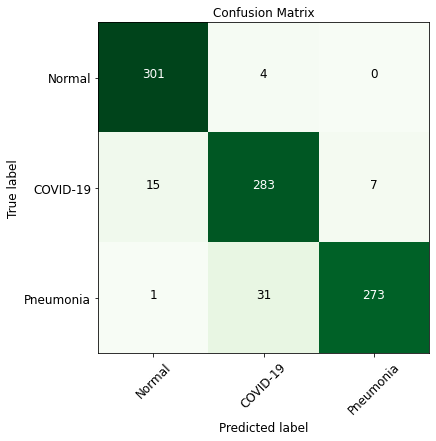

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 'larger')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize = 'larger')
        plt.yticks(tick_marks, target_names, fontsize = 'larger')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 'larger')
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize = 'larger')


    plt.tight_layout()
    plt.ylabel('True label', fontsize = 'larger')
    plt.xlabel('Predicted label', fontsize = 'larger')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(confusion__matrix, 
                      normalize = False,
                      target_names = ['Normal', 'COVID-19', 'Pneumonia'],
                      title        = "Confusion Matrix")


In [ ]:
FP = confusion__matrix.sum(axis=0) - np.diag(confusion__matrix)  
FN = confusion__matrix.sum(axis=1) - np.diag(confusion__matrix)
TP = np.diag(confusion__matrix)
TN = confusion__matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)               
TN = TN.astype(float)


In [ ]:
FPR = FP/(FP+TN) 
print("False positive rate : ",FPR)

False positive rate :  [0.02622951 0.05737705 0.01147541]


In [ ]:
FNR = FN/(FN+TP)
print("False negative rate : ",FNR)

False negative rate :  [0.01311475 0.07213115 0.10491803]


In [ ]:
TNR = TN/(TN+FP)
print("True negative rate(OR)Specificity : ",TNR)

True negative rate(OR)Specificity :  [0.97377049 0.94262295 0.98852459]


In [ ]:
NPV = TN/(TN+FN)
print("Negative predictive value : ",NPV)

Negative predictive value :  [0.99331104 0.96314908 0.9496063 ]


In [ ]:
FDR = FP/(FP+TP)
print("False predictive rate : ",FDR)

False predictive rate :  [0.05047319 0.11006289 0.025     ]


In [ ]:
TPR = TP/(TP+FN)
print("True positive rate : ",TPR)

True positive rate :  [0.98688525 0.92786885 0.89508197]


In [ ]:
PPV = TP/(TP+FP)
print("Positive predictive value : ",PPV)

Positive predictive value :  [0.94952681 0.88993711 0.975     ]


In [ ]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy of this model is : ",np.average(accuracy))

Accuracy of this model is :  0.9577413479052823


In [ ]:
from sklearn.metrics import fbeta_score
print("F-beta score for beta =",10,"is",fbeta_score(testY, np.argmax(predY, axis = -1),4,average='macro'))

F-beta score for beta = 10 is 0.9365244654021095


In [ ]:
print("F-beta score for beta =",1,"is",fbeta_score(testY, np.argmax(predY, axis = -1),1,average='macro'))

F-beta score for beta = 1 is 0.9365620718704283


In [ ]:
print("F-beta score for beta =",2,"is",fbeta_score(testY, np.argmax(predY, axis = -1),2,average='macro'))

F-beta score for beta = 2 is 0.9364020763374968


In [ ]:
from sklearn.metrics import cohen_kappa_score

print("Cohen kappa score is : ",cohen_kappa_score(testY, np.argmax(predY, axis = -1)))

Cohen kappa score is :  0.9049180327868852


In [ ]:
from sklearn.metrics import matthews_corrcoef
print("Matthews correlation coefficient is : ",matthews_corrcoef(testY, np.argmax(predY, axis = -1)))

Matthews correlation coefficient is :  0.9056793733504177


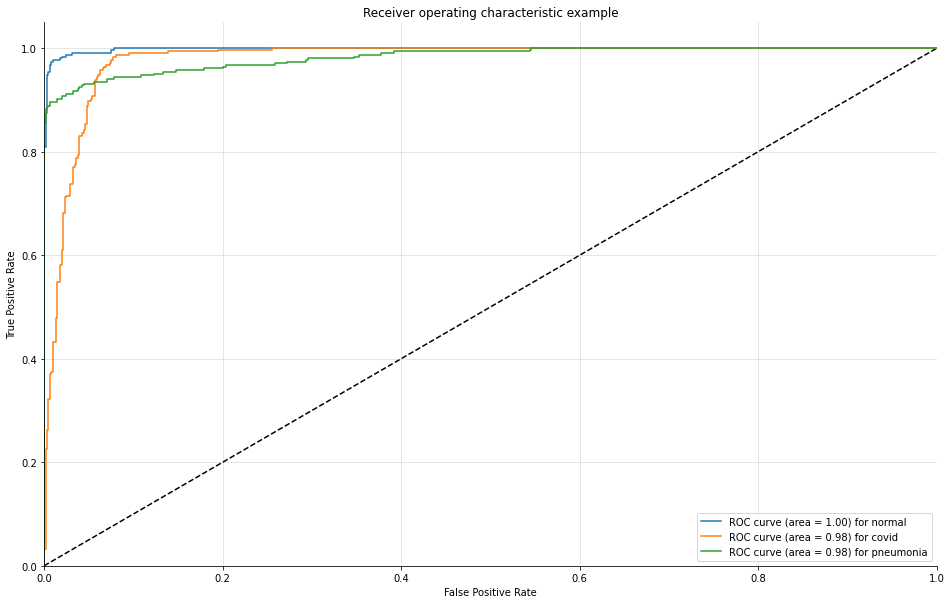

In [ ]:
import seaborn as sns
def plot_multiclass_roc(y_test, y_score, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_to_label_map[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(testY, predY, n_classes=3, figsize=(16, 10))

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(testY, predY,multi_class='ovr')
print("Roc-auc score of the model is: ",roc_auc)

Roc-auc score of the model is:  0.986294006987369


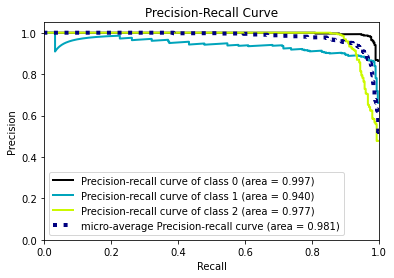

In [ ]:
from scikitplot.metrics import plot_precision_recall

fig, ax = plt.subplots()
plot_precision_recall(testY, predY, ax=ax)

In [ ]:
from sklearn.preprocessing import label_binarize
testY = test_generator.classes
# Use label_binarize to be multi-label like settings
testy = label_binarize(testY, classes=[0, 1, 2])

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = dict()
predy = label_binarize(np.argmax(predY, axis = -1), classes=[0, 1, 2])
for i in range(3):
  average_precision[i] = average_precision_score(testy[:, i], predy[:, i])


print("Average precision score is : ",average_precision)

Average precision score is :  {0: 0.9414455879057421, 1: 0.8497886380039179, 2: 0.9076775956284152}


In [ ]:
from sklearn.metrics import log_loss

print("Log loss metric for this model is : ",log_loss(testy,predy))

Log loss metric for this model is :  2.189343203174668


In [ ]:
from sklearn.metrics import brier_score_loss

brier_score={}
for i in range(3):
  brier_score[i] = brier_score_loss(testy[:,i], predY[:,i])
print("brier score for this model is : ",brier_score)

brier score for this model is :  {0: 0.017546759490223635, 1: 0.04975005900702551, 2: 0.03469920444603155}


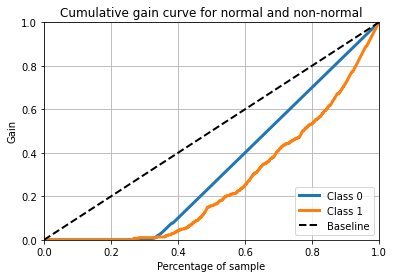

In [ ]:
from scikitplot.metrics import plot_cumulative_gain

fig, ax = plt.subplots()

plot_cumulative_gain(testy[:,0],predY,ax=ax,title="Cumulative gain curve for normal and non-normal")

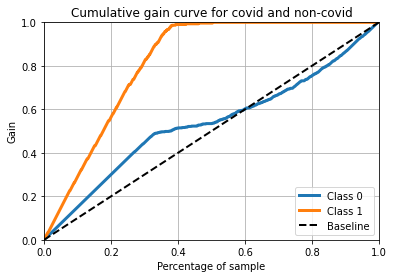

In [ ]:
from scikitplot.metrics import plot_cumulative_gain

fig, ax = plt.subplots()

plot_cumulative_gain(testy[:,1],predY,ax=ax,title="Cumulative gain curve for covid and non-covid")

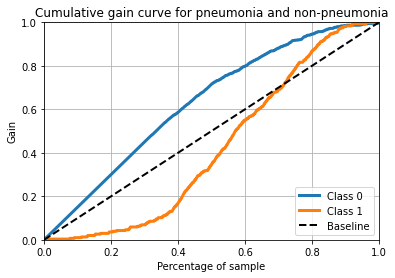

In [ ]:
from scikitplot.metrics import plot_cumulative_gain

fig, ax = plt.subplots()

plot_cumulative_gain(testy[:,2],predY,ax=ax,title="Cumulative gain curve for pneumonia and non-pneumonia")

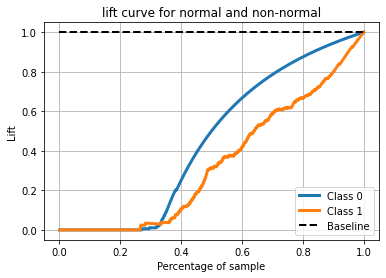

In [ ]:
from scikitplot.metrics import plot_lift_curve
fig, ax = plt.subplots()
plot_lift_curve(testy[:,0],predY,ax=ax,title="lift curve for normal and non-normal")

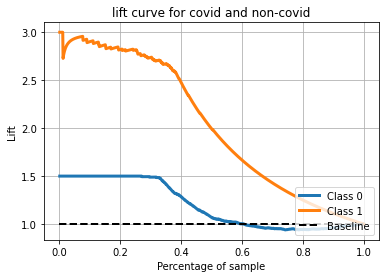

In [ ]:
fig, ax = plt.subplots()
plot_lift_curve(testy[:,1],predY,ax=ax,title="lift curve for covid and non-covid")

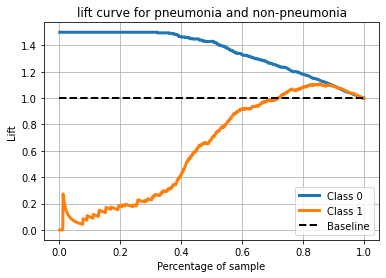

In [ ]:
fig, ax = plt.subplots()
plot_lift_curve(testy[:,2],predY,ax=ax,title="lift curve for pneumonia and non-pneumonia")

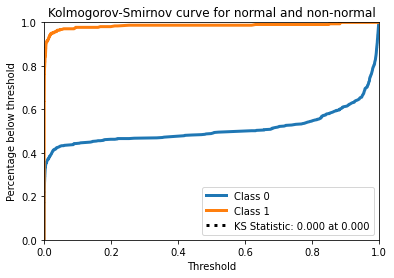

In [ ]:
from scikitplot.metrics import plot_ks_statistic

fig, ax = plt.subplots()

plot_ks_statistic(testy[:,0],predY,ax=ax,title="Kolmogorov-Smirnov curve for normal and non-normal")

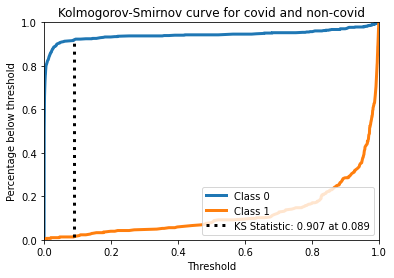

In [ ]:
fig, ax = plt.subplots()

plot_ks_statistic(testy[:,1],predY,ax=ax,title="Kolmogorov-Smirnov curve for covid and non-covid")